In [1]:
import pandas as pd
import numpy as np
import scipy 
from scipy.stats import norm
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math as m

In [2]:
#read data
table = pd.read_excel('D:\\2023semester\\Lund University\\Financial Risk Management\\lab4\\DataLab4.xlsx')
print(table)
one_year_tm = table.iloc[:, [1, 3]].to_numpy()
np.set_printoptions(precision=4,suppress=True)
one_year_tm = one_year_tm.T
print(one_year_tm)

  Rating  Prob_Loan_BBB  Loss_BBB  Prob_Loan_A  Loss_A
0    AAA         0.0002     -2.28       0.0009   -0.45
1     AA         0.0033     -2.10       0.0227   -0.23
2      A         0.0595     -1.57       0.9105   -0.12
3    BBB         0.8693     -0.46       0.0552    1.08
4     BB         0.0530      5.07       0.0074    3.16
5      B         0.0117      8.99       0.0026    5.56
6    CCC         0.0012     23.45       0.0001   18.78
7      D         0.0018     55.96       0.0006   55.96
[[0.0002 0.0033 0.0595 0.8693 0.053  0.0117 0.0012 0.0018]
 [0.0009 0.0227 0.9105 0.0552 0.0074 0.0026 0.0001 0.0006]]


# 1

In [3]:
#Monte Carlo Simulation
M = 100000
np.random.seed(1)
x1 = np.random.normal(0,1,M)

In [4]:
#Number of upgrades and downgrades
num_up_down = {
    'BBB_to_AAA': 0,
    'BBB_to_AA': 0,
    'BBB_to_A': 0,
    'BBB_to_BBB': 0,
    'BBB_to_BB': 0,
    'BBB_to_B': 0,
    'BBB_to_CCC': 0,
    'BBB_to_D': 0   }

cumulative_probs_BBB = np.cumsum(np.flip(one_year_tm[0,:]))
quantiles_BBB = norm.ppf(cumulative_probs_BBB[:-1])

for x in x1:
    if x >= quantiles_BBB[6]:
        num_up_down['BBB_to_AAA'] += 1
    elif x >= quantiles_BBB[5] and x <= quantiles_BBB[6]:
        num_up_down['BBB_to_AA'] += 1
    elif x >= quantiles_BBB[4] and x <= quantiles_BBB[5]:
        num_up_down['BBB_to_A'] += 1
    elif x >= quantiles_BBB[3] and x <= quantiles_BBB[4]:
        num_up_down['BBB_to_BBB'] += 1
    elif x >= quantiles_BBB[2] and x <= quantiles_BBB[3]:
        num_up_down['BBB_to_BB'] += 1
    elif x >= quantiles_BBB[1] and x <= quantiles_BBB[2]:
        num_up_down['BBB_to_B'] += 1
    elif x >= quantiles_BBB[0] and x <= quantiles_BBB[1]:
        num_up_down['BBB_to_CCC'] += 1
    elif x <= quantiles_BBB[0]:
        num_up_down['BBB_to_D'] += 1

print("Number of upgrade from BBB to AAA:", num_up_down['BBB_to_AAA'])
print("Number of upgrade from BBB to AA:", num_up_down['BBB_to_AA'])
print("Number of upgrade from BBB to A:", num_up_down['BBB_to_A'])
print("Number of samegrade from BBB to BBB:", num_up_down['BBB_to_BBB'])
print("Number of downgrade from BBB to BB:", num_up_down['BBB_to_BB'])
print("Number of downgrade from BBB to B:", num_up_down['BBB_to_B'])
print("Number of downgrade from BBB to CCC:", num_up_down['BBB_to_CCC'])
print("Number of downgrade from BBB to D:", num_up_down['BBB_to_D'])


Number of upgrade from BBB to AAA: 22
Number of upgrade from BBB to AA: 348
Number of upgrade from BBB to A: 5996
Number of samegrade from BBB to BBB: 87065
Number of downgrade from BBB to BB: 5140
Number of downgrade from BBB to B: 1124
Number of downgrade from BBB to CCC: 116
Number of downgrade from BBB to D: 189


# 2

In [5]:
#VaR
sigma_p = 3.35
alphas = [0.99, 0.999, 0.9999]

for alpha in alphas:
    VaR = norm.ppf(alpha,loc=0,scale=3.35) 
    print(f"VaR (alpha = {alpha}): {VaR:.4f}")


VaR (alpha = 0.99): 7.7933
VaR (alpha = 0.999): 10.3523
VaR (alpha = 0.9999): 12.4587


# 3

In [6]:
#Monte Carlo Simulation
M = 100000
np.random.seed(1)
x1 = np.random.normal(0,1,M)
x2 = np.random.normal(0,1,M)
print(scipy.stats.pearsonr(x1, x2)) #Independent

PearsonRResult(statistic=-0.005551580831574802, pvalue=0.07916432147451569)


In [7]:
#Quantile
cumulative_probs_A = np.cumsum(np.flip(one_year_tm[1,:]))
quantiles_A = norm.ppf(cumulative_probs_A[:-1])
print(f"quantile BBB: {quantiles_BBB}")   #calculate before
print(f"quantile A: {quantiles_A}")

quantile BBB: [-2.9112 -2.7478 -2.1781 -1.4931  1.5301  2.6968  3.5401]
quantile A: [-3.2389 -3.1947 -2.7164 -2.3009 -1.507   1.9845  3.1214]


# 4

In [8]:
#Add correlation
R = 0
q1 = x1
q2 = R*x1+np.sqrt(1-R**2)*x2 
print(scipy.stats.pearsonr(q1, q2))
empirical_correlation = np.corrcoef(q1, q2)[0, 1]
print(f"empirical correlation: {empirical_correlation:.2f}")  # check

PearsonRResult(statistic=-0.005551580831574802, pvalue=0.07916432147451569)
empirical correlation: -0.01


# 5

In [9]:
#Number of upgrades and downgrades
num_up_down = {
    'BBB_to_AAA': 0,
    'BBB_to_AA': 0,
    'BBB_to_A': 0,
    'BBB_to_BBB': 0,
    'BBB_to_BB': 0,
    'BBB_to_B': 0,
    'BBB_to_CCC': 0,
    'BBB_to_D': 0   }

for q in q1:
    if q >= quantiles_BBB[6]:
        num_up_down['BBB_to_AAA'] += 1
    elif q >= quantiles_BBB[5] and q <= quantiles_BBB[6]:
        num_up_down['BBB_to_AA'] += 1
    elif q >= quantiles_BBB[4] and q <= quantiles_BBB[5]:
        num_up_down['BBB_to_A'] += 1
    elif q >= quantiles_BBB[3] and q <= quantiles_BBB[4]:
        num_up_down['BBB_to_BBB'] += 1
    elif q >= quantiles_BBB[2] and q <= quantiles_BBB[3]:
        num_up_down['BBB_to_BB'] += 1
    elif q >= quantiles_BBB[1] and q <= quantiles_BBB[2]:
        num_up_down['BBB_to_B'] += 1
    elif q >= quantiles_BBB[0] and q <= quantiles_BBB[1]:
        num_up_down['BBB_to_CCC'] += 1
    elif q <= quantiles_BBB[0]:
        num_up_down['BBB_to_D'] += 1

print("Number of upgrade from BBB to AAA:", num_up_down['BBB_to_AAA'])
print("Number of upgrade from BBB to AA:", num_up_down['BBB_to_AA'])
print("Number of upgrade from BBB to A:", num_up_down['BBB_to_A'])
print("Number of samegrade from BBB to BBB:", num_up_down['BBB_to_BBB'])
print("Number of downgrade from BBB to BB:", num_up_down['BBB_to_BB'])
print("Number of downgrade from BBB to B:", num_up_down['BBB_to_B'])
print("Number of downgrade from BBB to CCC:", num_up_down['BBB_to_CCC'])
print("Number of downgrade from BBB to D:", num_up_down['BBB_to_D'])
print("The same as what we got in 1")

Number of upgrade from BBB to AAA: 22
Number of upgrade from BBB to AA: 348
Number of upgrade from BBB to A: 5996
Number of samegrade from BBB to BBB: 87065
Number of downgrade from BBB to BB: 5140
Number of downgrade from BBB to B: 1124
Number of downgrade from BBB to CCC: 116
Number of downgrade from BBB to D: 189
The same as what we got in 1


# 6

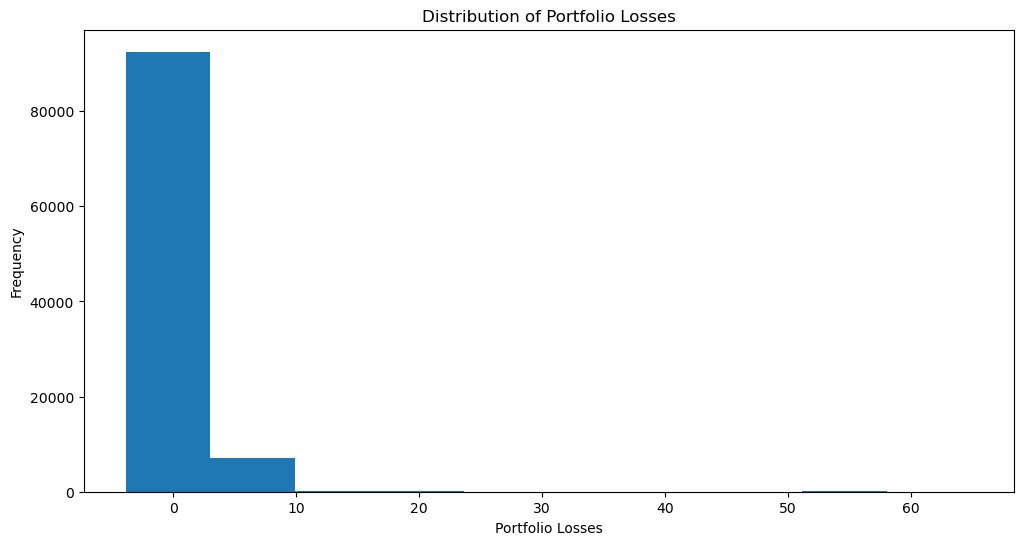

In [10]:
#Portfolio losses
BBB_losses = []

for q in q1:
    if q >= quantiles_BBB[6]:
        BBB_loss = table.Loss_BBB[0]
    elif q >= quantiles_BBB[5] and q <= quantiles_BBB[6]:
        BBB_loss = table.Loss_BBB[1]
    elif q >= quantiles_BBB[4] and q <= quantiles_BBB[5]:
        BBB_loss = table.Loss_BBB[2]
    elif q >= quantiles_BBB[3] and q <= quantiles_BBB[4]:
        BBB_loss = table.Loss_BBB[3]
    elif q >= quantiles_BBB[2] and q <= quantiles_BBB[3]:
        BBB_loss = table.Loss_BBB[4]
    elif q >= quantiles_BBB[1] and q <= quantiles_BBB[2]:
        BBB_loss = table.Loss_BBB[5]
    elif q >= quantiles_BBB[0] and q <= quantiles_BBB[1]:
        BBB_loss = table.Loss_BBB[6]
    elif q <= quantiles_BBB[0]:
        BBB_loss = table.Loss_BBB[7]
    BBB_losses.append(BBB_loss)


A_losses = []

for q in q2:
    if q >= quantiles_A[6]:
        A_loss = table.Loss_A[0]
    elif q >= quantiles_A[5] and q <= quantiles_A[6]:
        A_loss = table.Loss_A[1]
    elif q >= quantiles_A[4] and q <= quantiles_A[5]:
        A_loss = table.Loss_BBB[2]
    elif q >= quantiles_A[3] and q <= quantiles_A[4]:
        A_loss = table.Loss_BBB[3]
    elif q >= quantiles_A[2] and q <= quantiles_A[3]:
        A_loss = table.Loss_BBB[4]
    elif q >= quantiles_A[1] and q <= quantiles_A[2]:
        A_loss = table.Loss_BBB[5]
    elif q >= quantiles_A[0] and q <= quantiles_A[1]:
        A_loss = table.Loss_A[6]
    elif q <= quantiles_A[0]:
        A_loss = table.Loss_A[7]
    A_losses.append(A_loss)

portfolio_losses = np.array(BBB_losses) + np.array(A_losses)



plt.figure(figsize=(12, 6))
plt.hist(portfolio_losses)
plt.title('Distribution of Portfolio Losses')
plt.xlabel('Portfolio Losses')
plt.ylabel('Frequency')
plt.show()


# 7

In [11]:
#VaR
alphas = [0.99, 0.999, 0.9999]
print("When R=0")
for alpha in alphas:
    VaR = np.quantile(portfolio_losses, alpha)
    print(f"VaR (alpha = {alpha}): {VaR:.4f};")


When R=0
VaR (alpha = 0.99): 7.4200;
VaR (alpha = 0.999): 54.3900;
VaR (alpha = 0.9999): 55.7300;


# When R=0.35
VaR (alpha = 0.99): 7.4200;
VaR (alpha = 0.999): 55.5000;
VaR (alpha = 0.9999): 64.9500;

# 8

a)
Because higher confidence levels focus more on extreme values, but normal distriburion is not efficient at capturing the extreme events. As confidence levels increase, the tails of the loss distribution become more critical for VaR estimation. However, normal distribution assumes symmetric tails and may underestimate the likelihood of extreme losses. Therefore, at higher confidence levels, where extreme events are more important, the normal approximation tends to be far from the true portfolio VaR. In contrast, at the lowest confidence level, where extreme events are less emphasized, the normal approximation may be more accurate.



b)
Asset correlation R matters for the VaR estimate at higher confidence leve.
When the asset correlation is high, if one of the two loans defaults, the other loan will have a higher possibility of defaulting as well. This increases the overall risk of the portfolio because both loans are likely to fail together in extreme scenarios. As a result, the VaR will be in a larger value compared to when the asset correlation is low or zero.
